In [10]:
# ================================================================
# 1. GEREKLİ KÜTÜPHANELER
# ================================================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

# MODELLER
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [11]:
# ================================================================
# 2. VERİYİ YÜKLE
# ================================================================
# → Buraya kendi veri seti yolunu yaz
df = pd.read_csv("NYC_Crash_Model_Final_Last.csv")

df.head()


,LATITUDE,LONGITUDE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION_TYPE,SEVERITY,BOROUGH_BRONX,BOROUGH_BROOKLYN,...,FACTOR_2_GROUP_Distracted,FACTOR_2_GROUP_Environmental,FACTOR_2_GROUP_Fatigued,FACTOR_2_GROUP_Impaired,FACTOR_2_GROUP_Mechanical Failure,FACTOR_2_GROUP_No Contribution,FACTOR_2_GROUP_Other Factor,ROAD_TYPE_ARTERIES_HIGHWAYS,ROAD_TYPE_LOCAL_MAIN_ROADS,ROAD_TYPE_SPECIAL_AREAS
0,40.621790,-73.970024,2023,11,3,1,1,1,0,1,...,0,0,0,0,0,1,0,0,1,0
1,40.667202,-73.866500,2021,9,6,9,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,40.709183,-73.956825,2021,12,2,17,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,40.868160,-73.831480,2021,12,2,8,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,40.671720,-73.897100,2021,12,2,21,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# ================================================================
# 3. FEATURE SEÇİMİ
# ================================================================
vehicle_features = [
    'IS_MULTI_VEHICLE',

    'VEHICLE_1_GROUP_Emergency',
    'VEHICLE_1_GROUP_Heavy Duty',
    'VEHICLE_1_GROUP_Passenger Car',
    'VEHICLE_1_GROUP_Taxi/Commercial',
    'VEHICLE_1_GROUP_Two Wheeler',

    'VEHICLE_2_GROUP_Emergency',
    'VEHICLE_2_GROUP_Heavy Duty',
    'VEHICLE_2_GROUP_Passenger Car',
    'VEHICLE_2_GROUP_Taxi/Commercial',
    'VEHICLE_2_GROUP_Two Wheeler'
]

# Tahmin etmek istediğin target → buraya sen karar ver (ör: "SEVERITY")
target = "SEVERITY"

X = df[vehicle_features]
y = df[target]

X.head()


,IS_MULTI_VEHICLE,VEHICLE_1_GROUP_Emergency,VEHICLE_1_GROUP_Heavy Duty,VEHICLE_1_GROUP_Passenger Car,VEHICLE_1_GROUP_Taxi/Commercial,VEHICLE_1_GROUP_Two Wheeler,VEHICLE_2_GROUP_Emergency,VEHICLE_2_GROUP_Heavy Duty,VEHICLE_2_GROUP_Passenger Car,VEHICLE_2_GROUP_Taxi/Commercial,VEHICLE_2_GROUP_Two Wheeler
0,1,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [13]:
# ================================================================
# 4. TRAIN / TEST AYIRMA
# ================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train boyutu:", X_train.shape)
print("Test boyutu:", X_test.shape)


Train boyutu: (1528858, 11)
Test boyutu: (382215, 11)


In [14]:
# ================================================================
# 5. VERİ ÖN İŞLEME (Opsiyonel)
# Sadece LogisticRegression ve KNN normalize edilmeli
# ================================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# ================================================================
# LINEAR REGRESSION
# ================================================================
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R2: 0.11196386678979786
Linear Regression MSE: 0.16265293734489222


Accuracy: 0.696503276951454
ROC–AUC (LogReg): 0.6532059217009609
[[223759  66164]
 [ 49837  42455]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79    289923
           1       0.39      0.46      0.42     92292

    accuracy                           0.70    382215
   macro avg       0.60      0.62      0.61    382215
weighted avg       0.71      0.70      0.70    382215



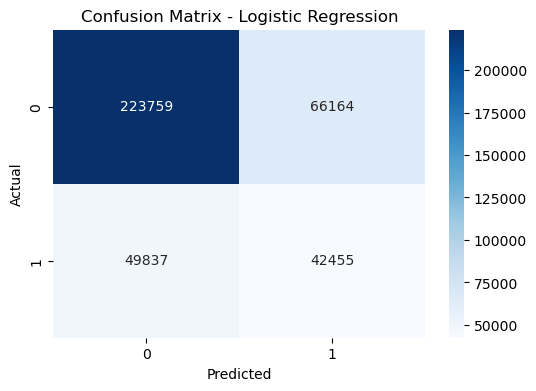

In [16]:
# ================================================================
# LOGISTIC REGRESSION
# ================================================================
logr = LogisticRegression(max_iter=500, class_weight='balanced')
logr.fit(X_train_scaled, y_train)

y_pred_logr = logr.predict(X_test_scaled)
y_score_logr = logr.predict_proba(X_test_scaled)[:, 1]
roc_auc_logr = roc_auc_score(y_test, y_score_logr)

print("Accuracy:", accuracy_score(y_test, y_pred_logr))
print("ROC–AUC (LogReg):", roc_auc_logr)
print(confusion_matrix(y_test, y_pred_logr))
print(classification_report(y_test, y_pred_logr))

cm = confusion_matrix(y_test, y_pred_logr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



ROC–AUC (Naive Bayes): 0.6460280378810714
Accuracy: 0.7911227973784388
[[282515   7408]
 [ 72428  19864]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88    289923
           1       0.73      0.22      0.33     92292

    accuracy                           0.79    382215
   macro avg       0.76      0.59      0.60    382215
weighted avg       0.78      0.79      0.74    382215



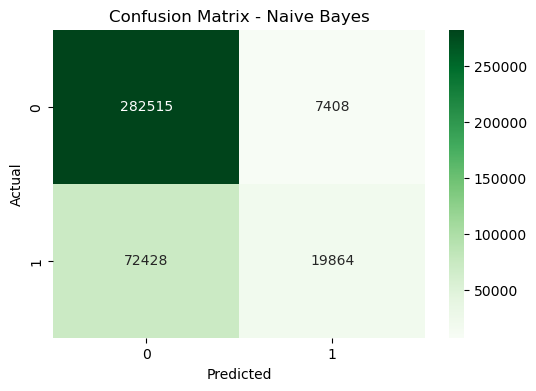

In [17]:
# ================================================================
# NAIVE BAYES
# ================================================================
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
y_score_nb = nb.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, y_score_nb)

print("ROC–AUC (Naive Bayes):", roc_auc_nb)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC–AUC (Decision Tree): 0.6553753147875684
Accuracy: 0.6910822442865926
[[220186  69737]
 [ 48336  43956]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79    289923
           1       0.39      0.48      0.43     92292

    accuracy                           0.69    382215
   macro avg       0.60      0.62      0.61    382215
weighted avg       0.72      0.69      0.70    382215



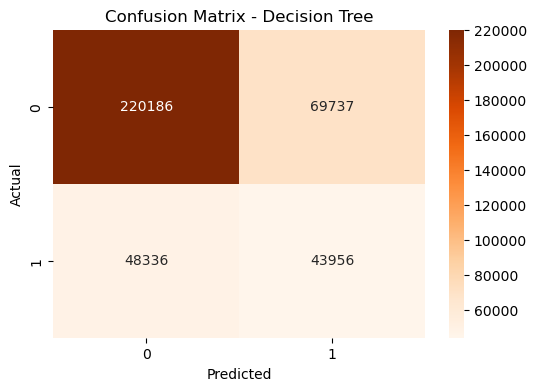

In [18]:
# ================================================================
# DECISION TREE
# ================================================================
dt  = DecisionTreeClassifier(max_depth=None, random_state=42, class_weight='balanced')
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

y_score_dt = dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_score_dt)
print("ROC–AUC (Decision Tree):", roc_auc_dt)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC–AUC (Random Forest): 0.6553752555146303
Random Forest Accuracy: 0.6910822442865926
[[220186  69737]
 [ 48336  43956]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79    289923
           1       0.39      0.48      0.43     92292

    accuracy                           0.69    382215
   macro avg       0.60      0.62      0.61    382215
weighted avg       0.72      0.69      0.70    382215



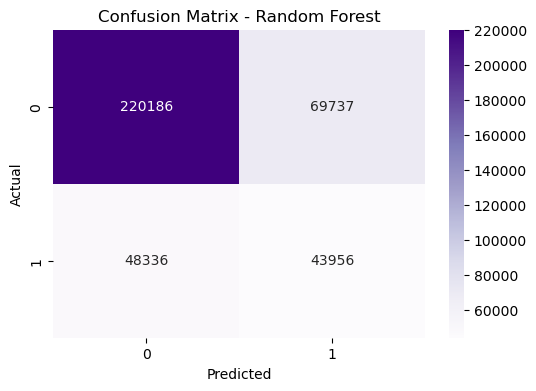

In [19]:
# ================================================================
# RANDOM FOREST (Advanced - Ensemble Model)
# Bu model base model değildir, ek performans karşılaştırması için eklenmiştir.
# ================================================================
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=200, random_state=42,
                             n_jobs=-1, class_weight='balanced')

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_score_rf = rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_score_rf)
print("ROC–AUC (Random Forest):", roc_auc_rf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KNN Predicting: 100%|████████████████████████████████████████████████████| 382215/382215 [1:57:49<00:00, 54.07sample/s]


ROC–AUC (KNN): 0.6050310284794509
Accuracy: 0.7860183404628285
[[280700   9223]
 [ 72564  19728]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87    289923
           1       0.68      0.21      0.33     92292

    accuracy                           0.79    382215
   macro avg       0.74      0.59      0.60    382215
weighted avg       0.77      0.79      0.74    382215



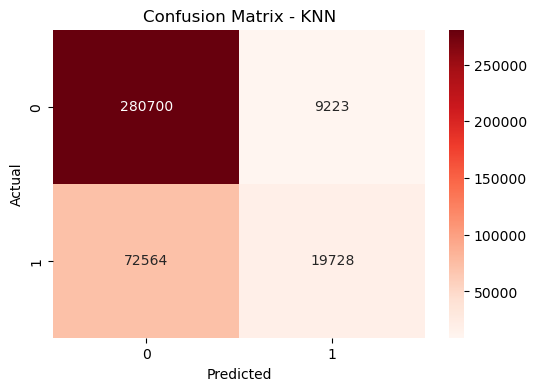

In [8]:
from tqdm import tqdm
import numpy as np

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict with progress bar
predictions = []
for i in tqdm(range(len(X_test_scaled)), desc="KNN Predicting", unit="sample"):
    pred = knn.predict(X_test_scaled[i].reshape(1, -1))
    predictions.append(pred[0])

y_pred_knn = np.array(predictions)
y_score_knn = knn.predict_proba(X_test_scaled)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_score_knn)
print("ROC–AUC (KNN):", roc_auc_knn)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree","Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logr),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

results


,Model,Accuracy
0,Logistic Regression,0.791466
1,KNN,0.786018
2,Naive Bayes,0.791123
3,Decision Tree,0.791466
4,Random Forest,0.791466


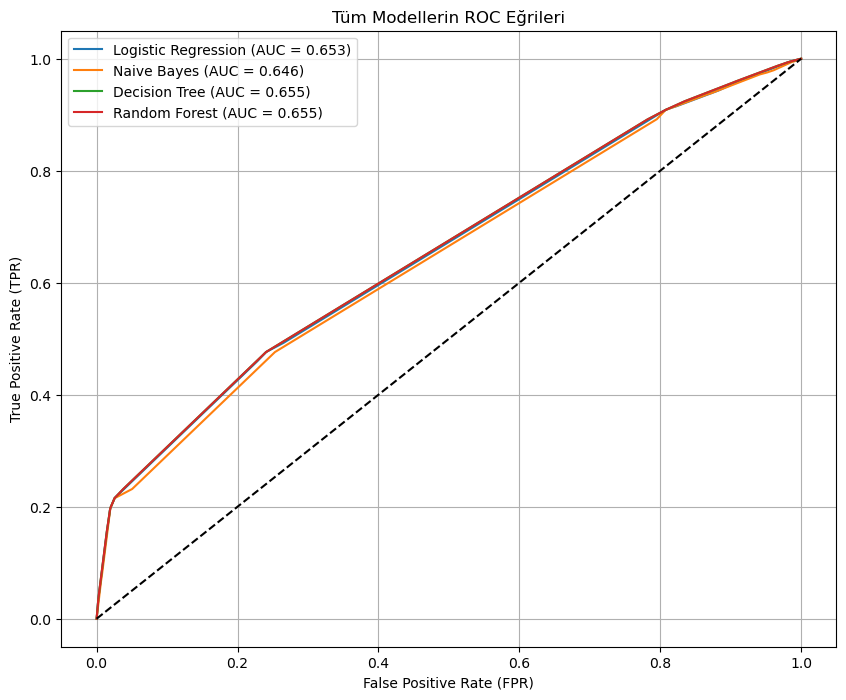

In [20]:
# ================================================================
# TÜM MODELLER İÇİN ROC EĞRİLERİ (TEK GRAFİK)
# ================================================================
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# --------------------------
# Logistic Regression
# --------------------------
fpr_logr, tpr_logr, _ = roc_curve(y_test, y_score_logr)
plt.plot(fpr_logr, tpr_logr, label=f"Logistic Regression (AUC = {roc_auc_logr:.3f})")

# --------------------------
# Naive Bayes
# --------------------------
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.3f})")

# --------------------------
# Decision Tree
# --------------------------
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.3f})")

# --------------------------
# Random Forest
# --------------------------
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")

# --------------------------
# KNN
# --------------------------
#fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
#plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.3f})")

# --------------------------
# Grafik Ayarları
# --------------------------
plt.plot([0, 1], [0, 1], 'k--')  # diagonal "random" çizgisi
plt.title("Tüm Modellerin ROC Eğrileri")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(True)
plt.show()
